In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy as sp
import statsmodels as sm
import statsmodels.graphics as graphstats

In [2]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

## Load S&P500 datasets:

In [4]:
SP500 = pd.read_csv("datasets/SP500.csv")
SP500.head()

,r500
0,-0.011727
1,0.002454
2,0.011052
3,0.019051
4,-0.005566


In [5]:
# try to find same date time in the book, but it do not look like same with
# this data althought i set date range for the business day
n = SP500.shape[0]
SPyear = pd.bdate_range('1/1/1981', periods=n, freq='B', tz='America/Mexico_City', normalize=True)
SPyear[:5]

DatetimeIndex(['1981-01-01 00:00:00-06:00', '1981-01-02 00:00:00-06:00',
               '1981-01-05 00:00:00-06:00', '1981-01-06 00:00:00-06:00',
               '1981-01-07 00:00:00-06:00'],
              dtype='datetime64[ns, America/Mexico_City]', freq='B')

In [6]:
SPReturn = SP500['r500']

Text(0.5, 1.0, 'Daily Log return S&P 500')

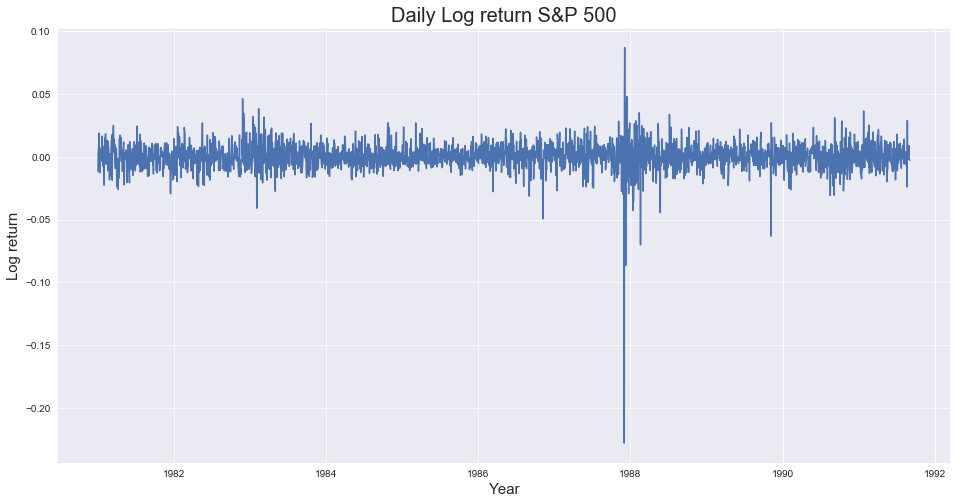

In [7]:
sns.lineplot(SPyear, SPReturn.values)
plt.xlabel("Year",size=15)
plt.ylabel("Log return",size=15)
plt.title("Daily Log return S&P 500", size=20)

In [8]:
data = [
    go.Scatter(
        x=SPyear,
        y=SP500['r500'].values,
        mode="lines",
        name="S&P500",
        marker = dict(
            color="orange"
        )
    )
]
layout = go.Layout(
            xaxis=dict(
                    title="Year"
                ),
            yaxis=dict(
                    title="Log Returns"
            ),
            title="Daily log returns S&P500"
)
fig = go.Figure(data, layout)
iplot(fig, filename="S&P500")

In [9]:
# outlier and check this day
SPReturn[SPReturn<=-0.2], SPyear[SPReturn<=-0.2]
# => it not Ocober 1987: Black Friday

(1804   -0.228006
 Name: r500, dtype: float64,
 DatetimeIndex(['1987-12-02 00:00:00-06:00'], dtype='datetime64[ns, America/Mexico_City]', freq='B'))

In [10]:
# i need to make daily series for myself
n = SP500.shape[0]
SPyear = 1981 + np.array([i+1 for i in range(n)])*(1991.25 - 1981)/n
SPyear

array([1981.00368308, 1981.00736615, 1981.01104923, ..., 1991.24263385,
       1991.24631692, 1991.25      ])

Text(0.5, 1.0, 'Daily log returns S&P500')

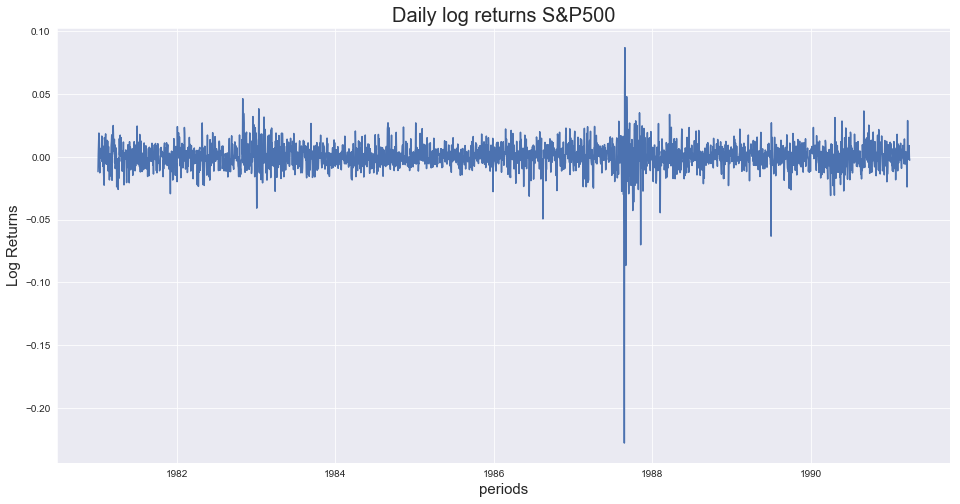

In [11]:
sns.lineplot(SPyear, SPReturn)
plt.xlabel("periods", size=15)
plt.ylabel("Log Returns", size=15)
plt.title("Daily log returns S&P500", size=20)

## Load DM/Dollar exchange datasets:

In [12]:
dt = sm.datasets.get_rdataset("Garch","Ecdat")
dt.data.head()
#dt = pd.read_csv("datasets/Garch.csv")
#dt.head()

,date,day,dm,ddm,bp,cd,dy,sf
0,800102,wednesday,0.5861,NaN,2.2490,0.8547,0.004206,0.6365
1,800103,thursday,0.5837,-0.004103,2.2365,0.8552,0.004187,0.6357
2,800104,friday,0.5842,0.000856,2.2410,0.8566,0.004269,0.6355
3,800107,monday,0.5853,0.001881,2.2645,0.8538,0.004315,0.6373
4,800108,tuesday,0.5824,-0.004967,2.2560,0.8553,0.004257,0.6329


In [13]:
diffdm = np.diff(dt.data.dm)

In [14]:
# stimulate year from January 1980 to May 1987
n = len(diffdm)
seq_i = np.array([i+1 for i in range(n)])
year_dm = 1980 + seq_i*((1987.5 - 1980)/n)
year_dm

array([1980.00401929, 1980.00803859, 1980.01205788, ..., 1987.49196141,
       1987.49598071, 1987.5       ])

In [15]:
len(year_dm), len(diffdm)

(1866, 1866)

Text(0.5, 1.0, 'changes in DM/Dollar')

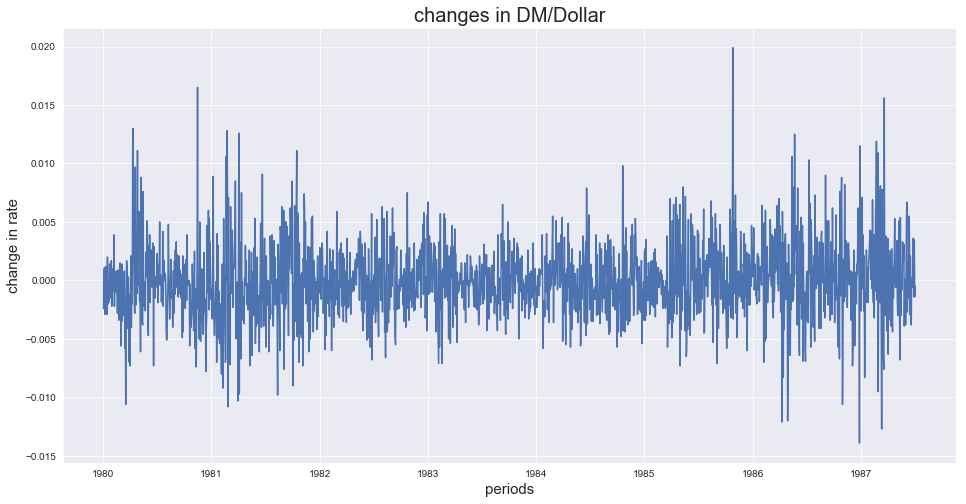

In [16]:
sns.lineplot(year_dm, diffdm)
plt.xlabel("periods", size=15)
plt.ylabel("change in rate", size=15)
plt.title("changes in DM/Dollar", size=20)

## Load data for changes in risk-free interest return

In [17]:
capm = pd.read_csv("datasets/Capm.csv")
rf = capm['rf'].values

In [18]:
month_rf = pd.bdate_range('1-1960','1-2003', freq='M')
month_rf

DatetimeIndex(['1960-01-31', '1960-02-29', '1960-03-31', '1960-04-30',
               '1960-05-31', '1960-06-30', '1960-07-31', '1960-08-31',
               '1960-09-30', '1960-10-31',
               ...
               '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30',
               '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31',
               '2002-11-30', '2002-12-31'],
              dtype='datetime64[ns]', length=516, freq='M')

In [19]:
diff_month_rf = np.diff(rf)

In [20]:
len(diff_month_rf), len(month_rf[1:])

(515, 515)

Text(0.5, 1.0, 'changes in risk-free interest return')

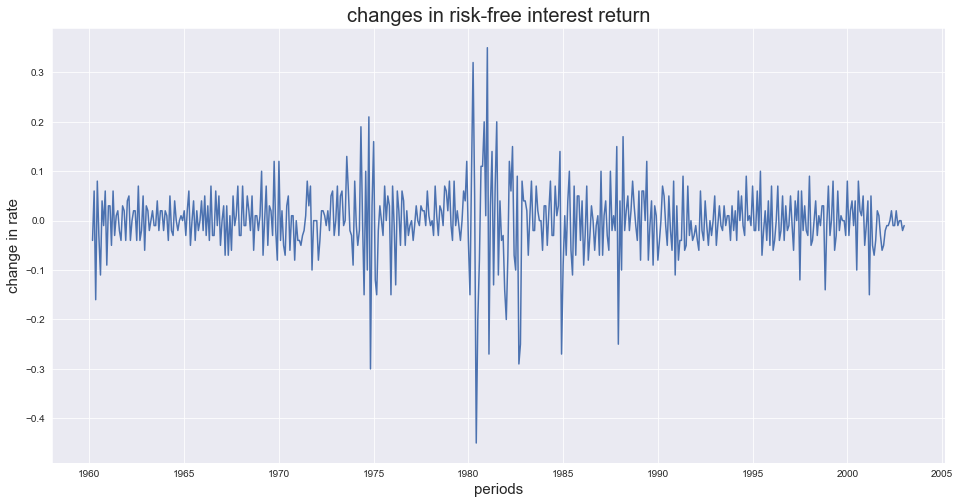

In [21]:
sns.lineplot(month_rf[1:], diff_month_rf)
plt.xlabel("periods", size=15)
plt.ylabel("change in rate", size=15)
plt.title("changes in risk-free interest return", size=20)

## Histogram with different cells(bins) and different range

Text(0.5, 1.0, '50 Cells in central')

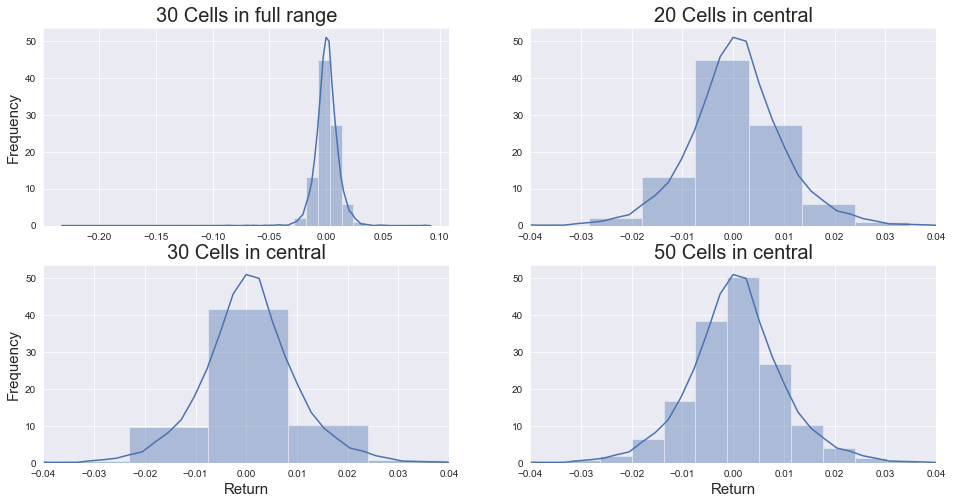

In [22]:
fig,ax = plt.subplots(nrows=2, ncols=2)

sns.distplot(SPReturn.values, bins=30,ax=ax[0,0])
#ax[0,0].set_xlabel("Return",size=15)
ax[0,0].set_ylabel("Frequency",size=15)
ax[0,0].set_title("30 Cells in full range", size=20)

sns.distplot(SPReturn.values, bins=30,ax=ax[0,1])
#ax[0,1].set_xlabel("Return",size=15)
ax[0,1].set_xlim([-0.04,0.04])
#ax[0,1].set_ylabel("Frequency",size=15)
ax[0,1].set_title("20 Cells in central", size=20)

sns.distplot(SPReturn.values, bins=20,ax=ax[1,0])
ax[1,0].set_xlabel("Return",size=15)
ax[1,0].set_xlim([-0.04,0.04])
ax[1,0].set_ylabel("Frequency",size=15)
ax[1,0].set_title("30 Cells in central", size=20)

sns.distplot(SPReturn.values, bins=50,ax=ax[1,1])
ax[1,1].set_xlabel("Return",size=15)
ax[1,1].set_xlim([-0.04,0.04])
#ax[1,1].set_ylabel("Frequency",size=15)
ax[1,1].set_title("50 Cells in central", size=20)

Note: kde have problem is often too bumpy in the tails => We need to improve it

## QQ Plots with 2 samples

In [23]:
len(SPReturn), len(diffdm)

(2783, 1866)

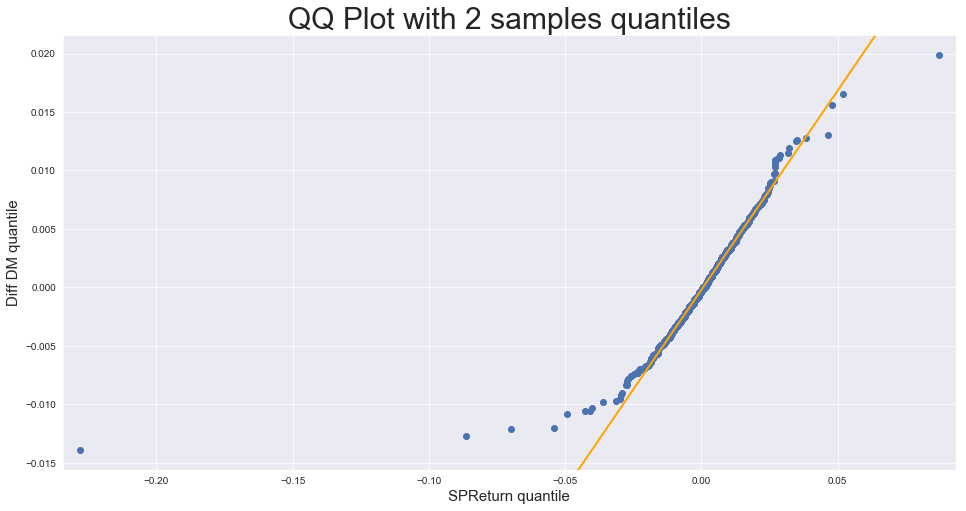

In [24]:
from statsmodels.graphics.gofplots import qqplot_2samples, ProbPlot
from statsmodels.graphics.regressionplots import abline_plot
# i took 1866 rows of SPReturn to accomodate with length DM/Dollar
xx = SPReturn[:1866].quantile([0.25,0.75]).values
yy = pd.Series(diffdm).quantile([0.25,0.75]).values
slope = (yy[1]-yy[0])/(xx[1]-xx[0])
inter = yy[0] - slope*xx[0]
fig, ax = plt.subplots(nrows=1, ncols=1)
qqplot_2samples(ProbPlot(diffdm),ProbPlot(SPReturn[:1866]), ax=ax)
abline_plot(inter,slope, linewidth=2, ax=ax, color='orange')
ax.set_xlabel("SPReturn quantile", size=15)
ax.set_ylabel("Diff DM quantile", size=15)
ax.set_title("QQ Plot with 2 samples quantiles", size=30)
plt.show()

## Load data European Stock Indice

In [25]:
euStock_R = sm.datasets.get_rdataset("EuStockMarkets")
euStock = euStock_R.data
euStock.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


In [26]:
print(euStock_R.__doc__)

+----------------+-----------------+
| EuStockMarkets | R Documentation |
+----------------+-----------------+

Daily Closing Prices of Major European Stock Indices, 1991–1998
---------------------------------------------------------------

Description
~~~~~~~~~~~

Contains the daily closing prices of major European stock indices:
Germany DAX (Ibis), Switzerland SMI, France CAC, and UK FTSE. The data
are sampled in business time, i.e., weekends and holidays are omitted.

Usage
~~~~~

::

   EuStockMarkets

Format
~~~~~~

A multivariate time series with 1860 observations on 4 variables. The
object is of class ``"mts"``.

Source
~~~~~~

The data were kindly provided by Erste Bank AG, Vienna, Austria.



Text(0.5, 0.98, 'European Stock Indice')

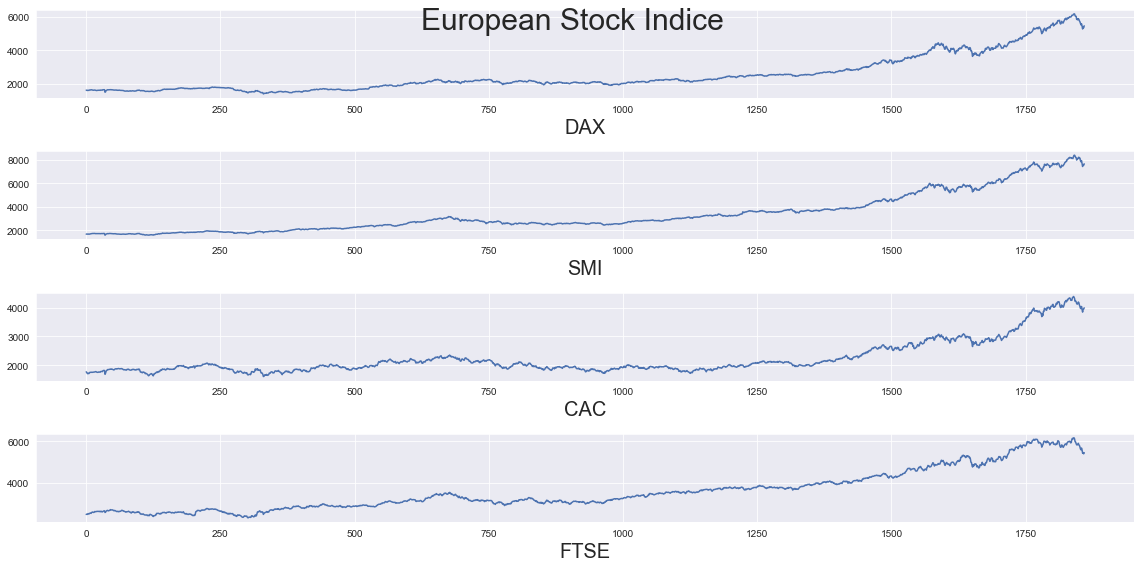

In [27]:
#Year_euStock = pd.bdate_range()
n = euStock.shape[0]
fig, ax = plt.subplots(nrows=4, ncols=1)
for r in range(euStock.shape[1]):
    sns.lineplot(list(euStock.index),list(euStock.iloc[:,r].values),ax=ax[r])
    ax[r].set_xlabel(f"{euStock.columns[r]}", size=20)
fig.tight_layout()
fig.suptitle("European Stock Indice", size=30)

In [28]:
euStock.describe()

,DAX,SMI,CAC,FTSE
count,1860.000000,1860.000000,1860.000000,1860.000000
mean,2530.656882,3376.223710,2227.828495,3565.643172
std,1084.792740,1663.026465,580.314198,976.715540
min,1402.340000,1587.400000,1611.000000,2281.000000
25%,1744.102500,2165.625000,1875.150000,2843.150000
50%,2140.565000,2796.350000,1992.300000,3246.600000
75%,2722.367500,3812.425000,2274.350000,3993.575000
max,6186.090000,8412.000000,4388.500000,6179.000000


In [29]:
logR_EuStock = pd.DataFrame(np.diff(np.log(euStock), axis=0)\
                            ,columns=euStock.columns)

In [30]:
logR_EuStock.head()

,DAX,SMI,CAC,FTSE
0,-0.009327,0.006178,-0.012659,0.006770
1,-0.004422,-0.005880,-0.018741,-0.004890
2,0.009004,0.003271,-0.005779,0.009027
3,-0.001778,0.001483,0.008743,0.005772
4,-0.004677,-0.008933,-0.005120,-0.007230


In [31]:
logR_EuStock.describe()

,DAX,SMI,CAC,FTSE
count,1859.000000,1859.000000,1859.000000,1859.000000
mean,0.000652,0.000818,0.000437,0.000432
std,0.010301,0.009250,0.011031,0.007958
min,-0.096277,-0.083825,-0.075753,-0.041399
25%,-0.004685,-0.003803,-0.006063,-0.004319
50%,0.000473,0.000886,0.000000,0.000080
75%,0.006355,0.006074,0.007096,0.005254
max,0.050760,0.049680,0.060977,0.054396


Text(0.5, 0.98, 'Log Return Euro Stock Indice')

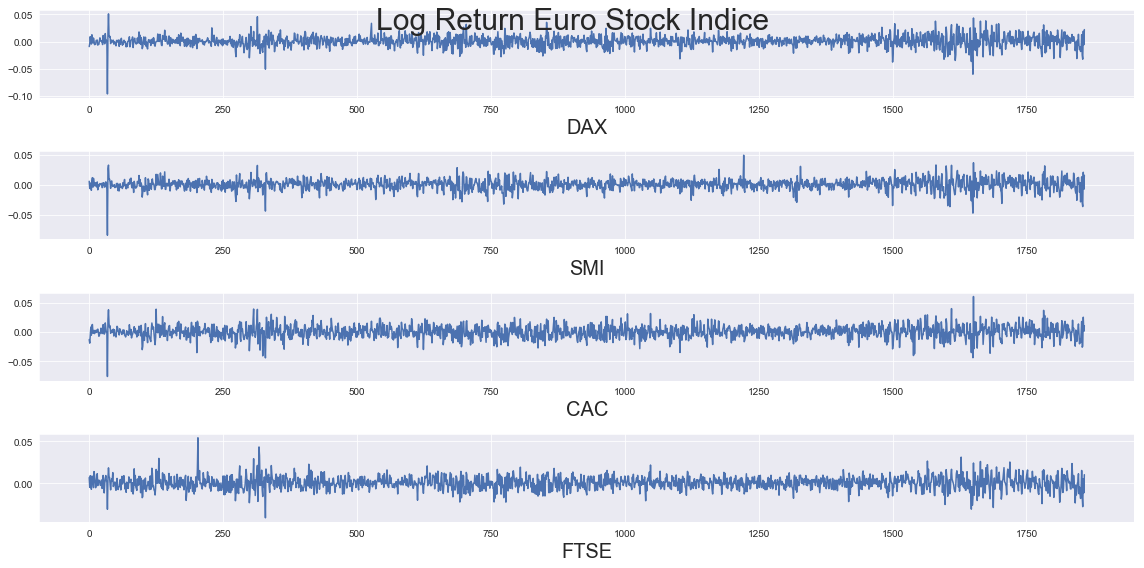

In [32]:
n = logR_EuStock.shape[0]
fig, ax = plt.subplots(nrows=4, ncols=1)
for r in range(logR_EuStock.shape[1]):
    sns.lineplot(list(logR_EuStock.index),list(logR_EuStock.iloc[:,r].values),ax=ax[r])
    ax[r].set_xlabel(f"{logR_EuStock.columns[r]}", size=20)
fig.tight_layout()
fig.suptitle("Log Return Euro Stock Indice", size=30)

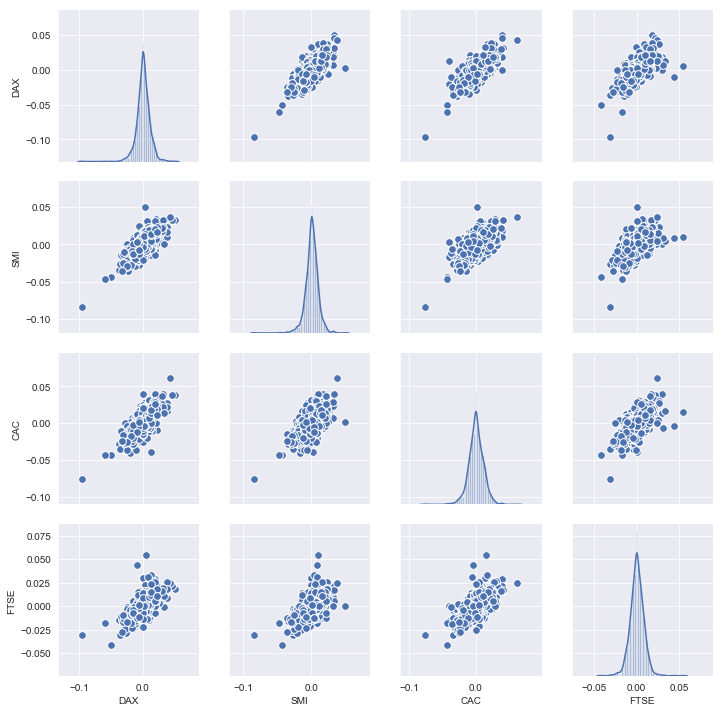

In [33]:
g = sns.PairGrid(logR_EuStock)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)
g = g.map_diag(sns.distplot)
#g = g.map_diag(sns.kdeplot, color="violet")

## Normal Plot for four time series and to test each for normality using the Shapiro-Wilk test 

Shapiro-Wilk test:	DAX
W:		0.9538372755050659
P value:	8.781170456587863e-24
Shapiro-Wilk test:	SMI
W:		0.9553713202476501
P value:	2.0771400254344025e-23
Shapiro-Wilk test:	CAC
W:		0.9820330739021301
P value:	1.5750655581224862e-14
Shapiro-Wilk test:	FTSE
W:		0.9799399375915527
P value:	1.7511823849331422e-15


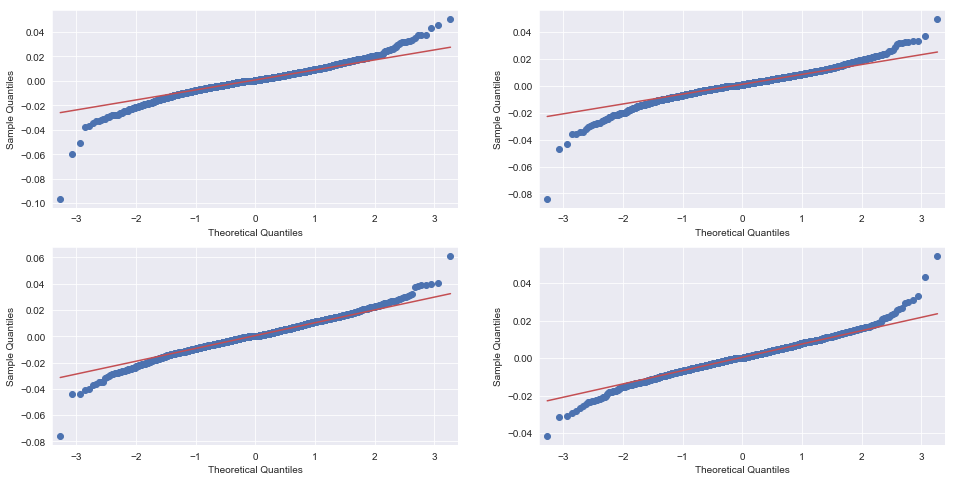

In [34]:
for i,c in enumerate(logR_EuStock.columns):
    sm.graphics.gofplots.qqplot(logR_EuStock.loc[:,str(c)].values,line="q",\
                                ax=plt.subplot(2,2,i+1))
    shapiro = st.shapiro(logR_EuStock.loc[:,str(c)].values)
    print(f"Shapiro-Wilk test:\t{c}\nW:\t\t{shapiro[0]}\nP value:\t{shapiro[1]}")
    

- From QQ-Plot: 
    - Four series have the marginal distribution symmetric but
    - lighter tailed distribution: Concave to Convex
- Test Shapiro with P value ~= 0 => rejet null hypothese => nonnormal distribution

In [35]:
## Create t-plot

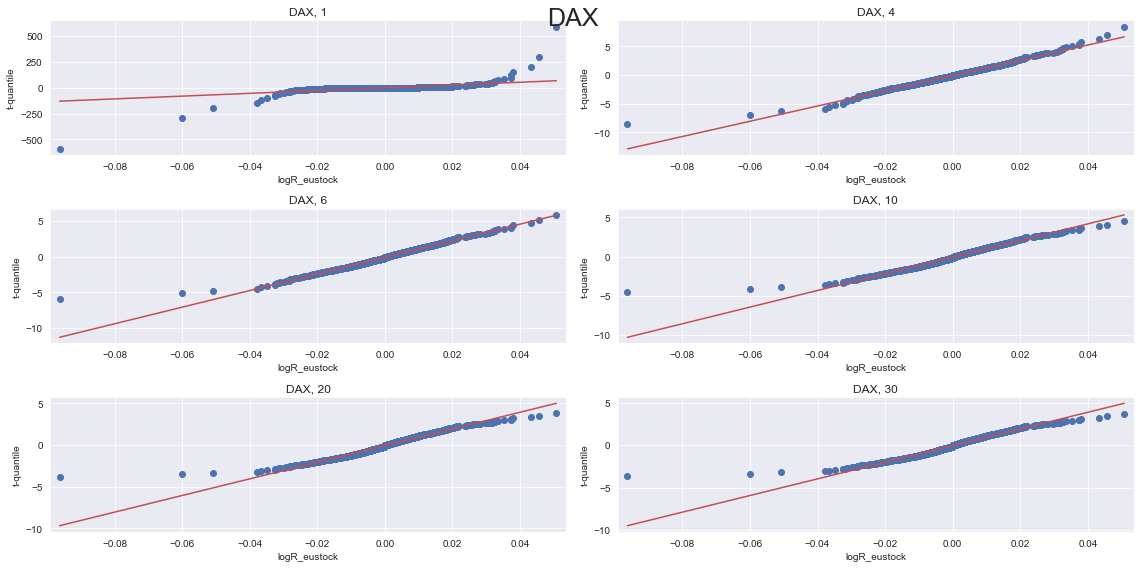

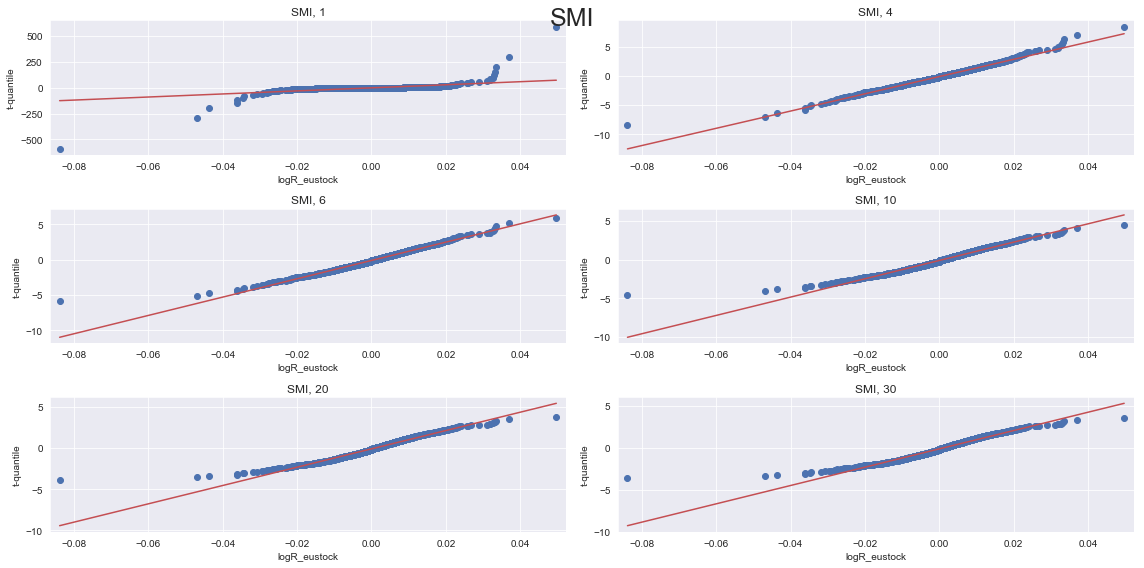

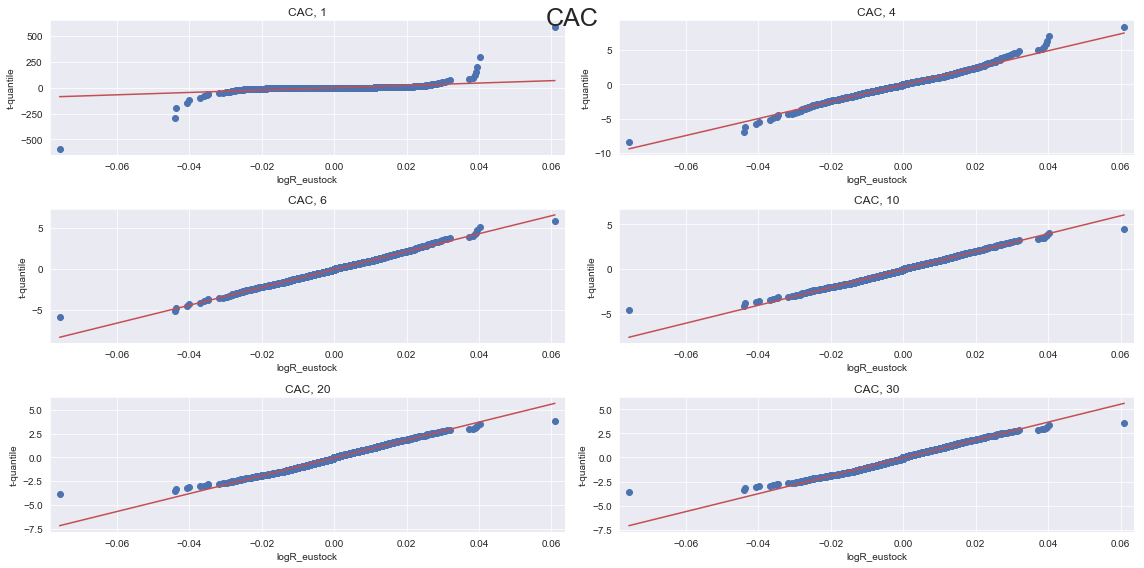

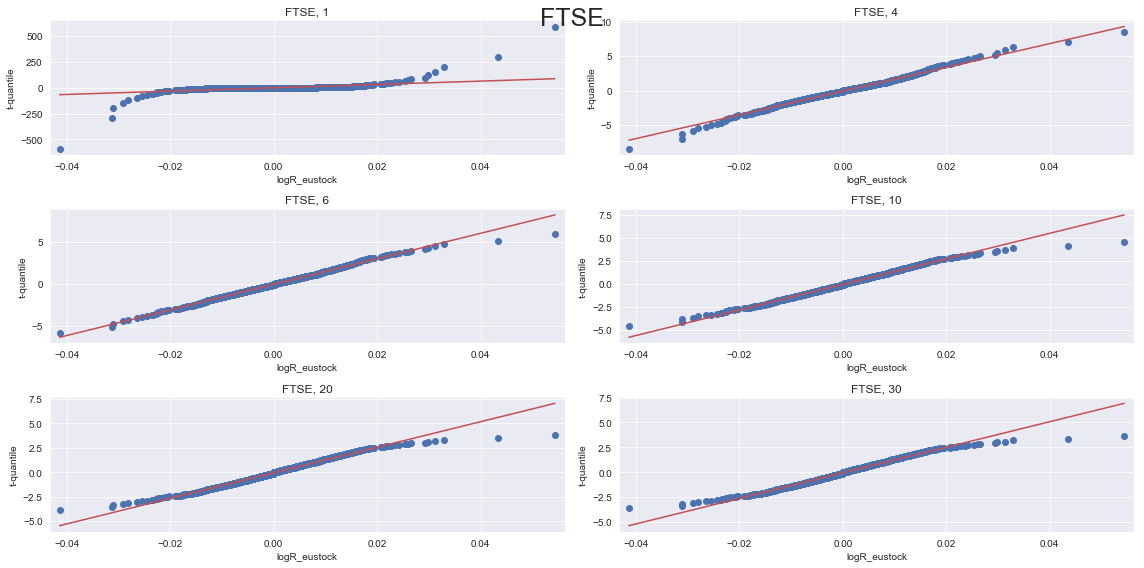

In [36]:
n = logR_EuStock.shape[0]
q_grid = np.array([i+1 for i in range(n)])/(n+1)
df_grid = [1,4,6,10,20,30]
index_name = logR_EuStock.columns
for c in (logR_EuStock.columns):
    fig = plt.figure()
    for j,df in enumerate(df_grid):
        qqplot_2samples(st.t.ppf(q_grid, df),\
                        logR_EuStock.loc[:,str(c)].values,\
                        line='r',\
                        xlabel="logR_eustock",\
                        ylabel="t-quantile",\
                       ax=plt.subplot(3,2,j+1,xlabel=f"logR_EuStock[:,{c}]",ylabel=f"ppf(q_grid,{df})",title=f"{c}, {df}"))     
        fig.suptitle(f"{c}", size=25)
        fig.tight_layout()

For DAX index, 4 degree of freedom parameter gives the best-fitting t-distribution.

## compare 3 distribution: KDE, t-distribution and normal distribution

In [37]:
def bw_nrd0(x):

    if len(x) < 2:
        raise(Exception("need at least 2 data points"))

    hi = np.std(x, ddof=0)
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    lo = min(hi, iqr/1.34)
    if not lo:
        if hi:
            lo = hi
        elif abs(x[0]):
            lo = abs(x[0])
        else:
            lo = 1

    return 0.9 * lo *len(x)**-0.2

In [38]:
bw_nrd0(logR_EuStock.loc[:,"DAX"].values)

0.0016454207439690388

In [43]:
from statsmodels.robust.scale import mad
df= 4
n = logR_EuStock.shape[0]
x = np.arange(-0.1,0.1,0.001)
c = np.sqrt(df/(df-2))/st.t.ppf(0.75, df)
print(c)
y = logR_EuStock.loc[:,"DAX"].values
bw = bw_nrd0(y)
mad_t = mad(y, c=c, axis=0)
print(mad_t)
sns.kdeplot(y)
sns.lineplot(x,st.t.pdf(x, loc=np.mean(y), scale=0.01045874, df=df))
sns.lineplot(x, st.norm.pdf(x, loc=np.mean(y), scale=np.std(y)))
plt.xlim([-0.05,0.05])

1.9093008366682314


AxisError: axis 1 is out of bounds for array of dimension 1

For CAC index, we saw that with degree of freedom is 6, that gives the best-fitting t-distribution

In [41]:
mad_t

0.0028690003231842897